<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/mincraft_ensamble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit ,cross_val_predict,cross_val_score
from sklearn.metrics import precision_recall_curve,precision_score,recall_score
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer

#Loading Data

In [33]:
data=pd.read_csv("/content/piracydataset.csv")

In [34]:
data

,Unnamed: 0,age,discordid,minecraftid,client,version
0,0,14.0,ProGamer300#3331,ProGamer300,Computer ( Java Edition ),Cracked
1,1,19.0,@shrey#4934,shrey_jain_,Computer ( Java Edition ),Cracked
2,2,18.0,Skullfaced#8657,Skullfaceddeath,Computer ( Java Edition ),Paid Version
3,3,17.0,Op DzGhOsT#8719,DzGHoST1737,Computer ( Java Edition ),Cracked
4,4,15.0,Dwijesh#6020,Dwijesh YT,Mobile ( bedrock version ),Paid Version
...,...,...,...,...,...,...
1418,1418,17.0,Savager,Asmitraj11,Computer ( Java Edition ),Cracked
1419,1419,15.0,( @KAMALTHESUPERBOY #6357),kamal1112,Computer ( Java Edition ),Cracked
1420,1420,17.0,ATHARVA#9034,SPIDEY_2,Computer ( Java Edition ),Cracked
1421,1421,15.0,GOD_RANVEER#3462,GOD_RANVEER,Computer ( Java Edition ),Cracked


we should to map the values to numbers which 0 and 1 

In [35]:
encoder=LabelEncoder()
data['version']=encoder.fit_transform(data['version'])

In [36]:
data

,Unnamed: 0,age,discordid,minecraftid,client,version
0,0,14.0,ProGamer300#3331,ProGamer300,Computer ( Java Edition ),0
1,1,19.0,@shrey#4934,shrey_jain_,Computer ( Java Edition ),0
2,2,18.0,Skullfaced#8657,Skullfaceddeath,Computer ( Java Edition ),1
3,3,17.0,Op DzGhOsT#8719,DzGHoST1737,Computer ( Java Edition ),0
4,4,15.0,Dwijesh#6020,Dwijesh YT,Mobile ( bedrock version ),1
...,...,...,...,...,...,...
1418,1418,17.0,Savager,Asmitraj11,Computer ( Java Edition ),0
1419,1419,15.0,( @KAMALTHESUPERBOY #6357),kamal1112,Computer ( Java Edition ),0
1420,1420,17.0,ATHARVA#9034,SPIDEY_2,Computer ( Java Edition ),0
1421,1421,15.0,GOD_RANVEER#3462,GOD_RANVEER,Computer ( Java Edition ),0


- if we took a look at the data balancing we will get that the data was not balanced which is mean that there is a probability for more bias to the dominant class

<ipython-input-37-ad15a41e6fc9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['version'])


<Axes: xlabel='version', ylabel='Density'>

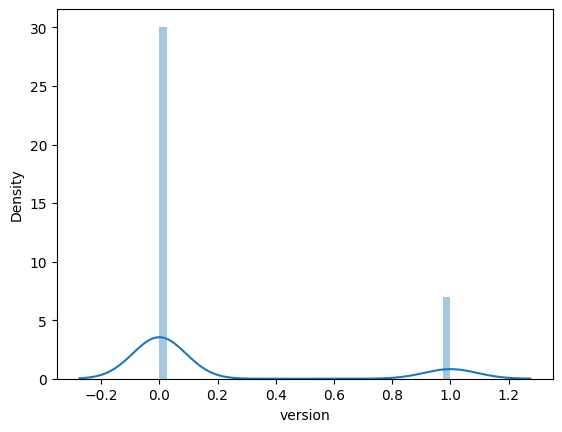

In [37]:
sns.distplot(data['version'])

- so there is alot of sloutions to handel it 
 

1.   use SMOTE algo to up sample the data
2.   use SMOTE algo to down sample the data
3.   move the threshold manually to high percetion and low recall ...for sure it will lead the model to predict un-hacked versions that hacked but it more better than if it miss the hacking one and treat with it as un-hacked.(Our way)



- tha data has 1 valu is None but others is NaN and we will handel both by the most frequent

In [38]:
data.isna().sum()

Unnamed: 0     0
age            1
discordid      0
minecraftid    0
client         0
version        0
dtype: int64

In [39]:
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data=imp.fit_transform(data)

In [40]:
data=pd.DataFrame(data=data,columns=["Unnamed: 0","age","discordid","minecraftid","client","version"])
data

,Unnamed: 0,age,discordid,minecraftid,client,version
0,0,14.0,ProGamer300#3331,ProGamer300,Computer ( Java Edition ),0
1,1,19.0,@shrey#4934,shrey_jain_,Computer ( Java Edition ),0
2,2,18.0,Skullfaced#8657,Skullfaceddeath,Computer ( Java Edition ),1
3,3,17.0,Op DzGhOsT#8719,DzGHoST1737,Computer ( Java Edition ),0
4,4,15.0,Dwijesh#6020,Dwijesh YT,Mobile ( bedrock version ),1
...,...,...,...,...,...,...
1418,1418,17.0,Savager,Asmitraj11,Computer ( Java Edition ),0
1419,1419,15.0,( @KAMALTHESUPERBOY #6357),kamal1112,Computer ( Java Edition ),0
1420,1420,17.0,ATHARVA#9034,SPIDEY_2,Computer ( Java Edition ),0
1421,1421,15.0,GOD_RANVEER#3462,GOD_RANVEER,Computer ( Java Edition ),0


In [41]:
data.fillna(data["age"].mode,inplace=True)

In [42]:
data.isna().sum()

Unnamed: 0     0
age            0
discordid      0
minecraftid    0
client         0
version        0
dtype: int64

- we can drop the "Unnamed: 0","discord","Minecraft" columns cause as mentioned in description the personal data columns are added as dummies and do not represent the real details 

In [43]:
data.drop(["Unnamed: 0","discordid","minecraftid"],axis=1,inplace=True)

In [44]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1423 non-null   float64
 1   client   1423 non-null   object 
 2   version  1423 non-null   object 
dtypes: float64(1), object(2)
memory usage: 33.5+ KB


In [46]:
data=pd.get_dummies(data=data,drop_first=True)

<ipython-input-46-baa5398c3624>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data=pd.get_dummies(data=data,drop_first=True)


In [47]:
data

,age,client_Mobile ( bedrock version ),version_1
0,14.0,0,0
1,19.0,0,0
2,18.0,0,1
3,17.0,0,0
4,15.0,1,1
...,...,...,...
1418,17.0,0,0
1419,15.0,0,0
1420,17.0,0,0
1421,15.0,0,0


-StratifiedShuffleSplit is a combination of both ShuffleSplit and StratifiedKFold. Using StratifiedShuffleSplit the proportion of distribution of class labels is almost even between train and test dataset. The major difference between StratifiedShuffleSplit and StratifiedKFold (shuffle=True) is that in StratifiedKFold, the dataset is shuffled only once in the beginning and then split into the specified number of folds. This discards any chances of overlapping of the train-test sets. 
However, in StratifiedShuffleSplit the data is shuffled each time before the split is done and this is why there’s a greater chance that overlapping might be possible between train-test sets. 

In [48]:
spliter=StratifiedShuffleSplit(n_splits=5)
for trainidx,testidx in spliter.split(data.iloc[:,:-1],data.iloc[:,-1]):
  trainx=data.iloc[trainidx,:]
  trainy=data.iloc[trainidx,-1]
  testx=data.iloc[testidx,:]
  testy=data.iloc[testidx,-1]


In [49]:
trainx.shape

(1280, 3)

In [50]:
trainy.shape

(1280,)

In [51]:
testx.shape

(143, 3)

In [52]:
testy.shape

(143,)

- Ridge regression adds the “squared magnitude” of the coefficient as the penalty term to the loss function. The highlighted part below represents the L2 regularization element.

In [55]:
model=SGDClassifier(penalty="l2")

In [56]:
scores=cross_val_score(model,trainx,trainy)
scores

array([1., 1., 1., 1., 1.])

- here we got the distance of each point and how much it's far from the threshold 
- and then get all the thresholds and their precision and recalls
- and get the highest precision that will move the threshold toward the dominant class

In [58]:
yscores=cross_val_predict(model,trainx,trainy,cv=3,method="decision_function")


In [61]:
percicetions,recalls,thresholds=precision_recall_curve(trainy,yscores)

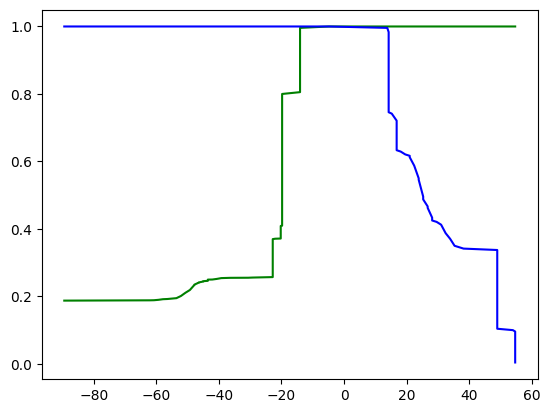

In [63]:
plt.plot(thresholds,percicetions[:-1],"g")
plt.plot(thresholds,recalls[:-1],"b")

- precision and recall curve is most curves that show the quality of model  

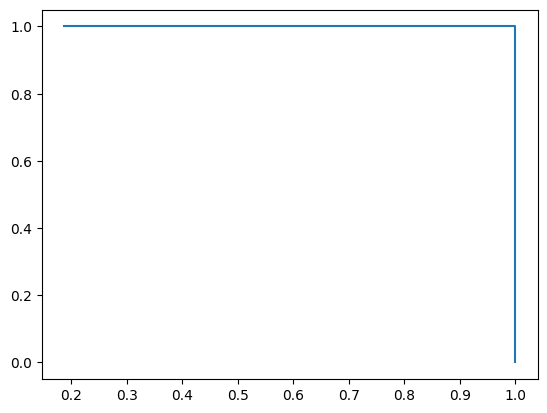

In [64]:
plt.plot(percicetions,recalls)

In [66]:
thresholds_with_96_P=thresholds[np.argmax(percicetions>=96)]

- always there is trad of between precition and recall so here as we see the precision is very high and recall is very low which the opposite

In [67]:
newclassifcatins=(yscores>=thresholds_with_96_P)

In [69]:
precision_score(newclassifcatins,trainy)

1.0

In [71]:
recall_score(newclassifcatins,trainy)

0.1875